In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


file_path = 'global_air_quality_data_10000.csv'
data = pd.read_csv(file_path)


conditions = [
    (data['PM2.5'] <= 50),
    (data['PM2.5'] > 50) & (data['PM2.5'] <= 100),
    (data['PM2.5'] > 100)
]
choices = ['Good', 'Moderate', 'Poor']
data['Air_Quality'] = np.select(conditions, choices)


label_encoder = LabelEncoder()
data['Air_Quality'] = label_encoder.fit_transform(data['Air_Quality'])


X = data.drop(columns=['Date', 'City', 'Country', 'Air_Quality'])
y = data['Air_Quality']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))




Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       615
           1       0.99      1.00      0.99       697
           2       1.00      1.00      1.00       688

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       697
           2       1.00      1.00      1.00       688

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



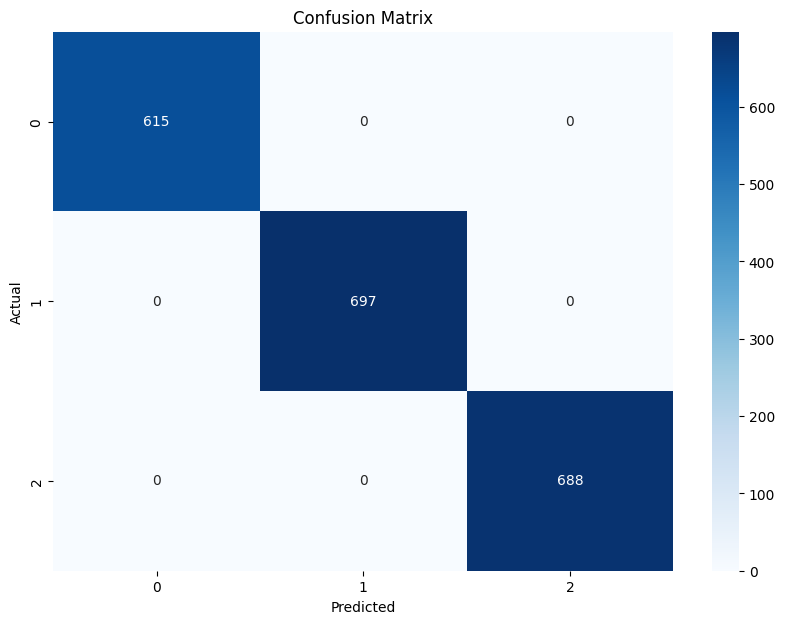

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


classifier = rf


cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Model:")
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       697
           2       1.00      1.00      1.00       688

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


X = data.drop(columns=['Date', 'City', 'Country', 'Air_Quality'])


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


score_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f'K-Means Silhouette Score: {score_kmeans}')


K-Means Silhouette Score: 0.07233577228239678


In [33]:
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_clustering.fit_predict(X_scaled)


score_agg = silhouette_score(X_scaled, clusters_agg)
print(f'Hierarchical Clustering Silhouette Score: {score_agg}')


Hierarchical Clustering Silhouette Score: 0.026224327596107502


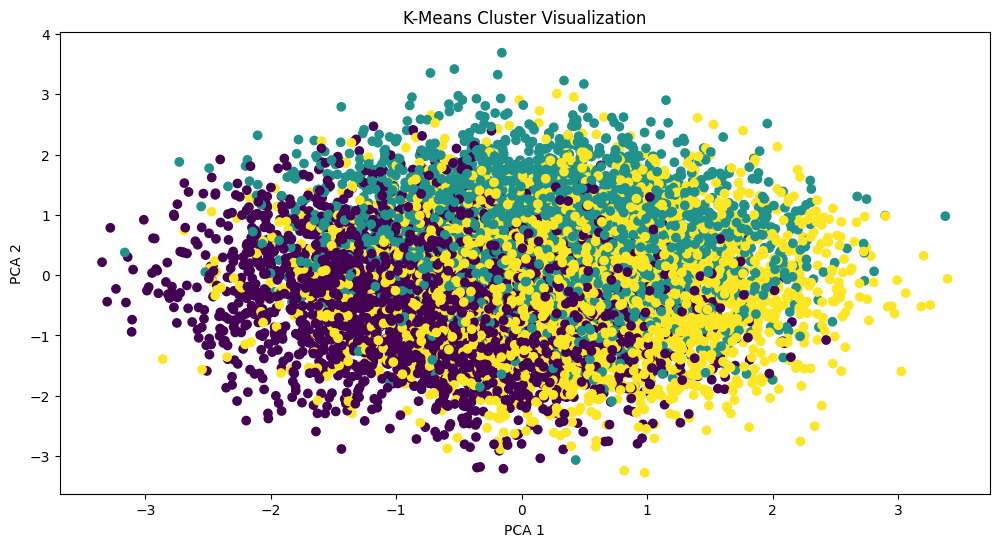

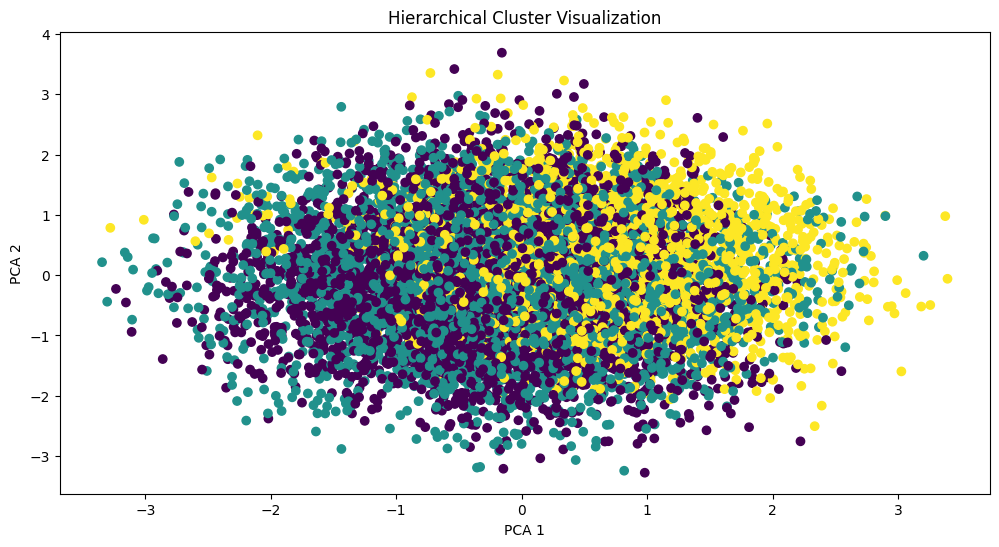

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Cluster Visualization')
plt.show()


plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hierarchical Cluster Visualization')
plt.show()



